In [2]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt

In [3]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_AREA)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [4]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    print(class_names)
    return class_names

In [5]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [6]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [7]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 200, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [8]:
yolo = YOLO(0.6, 0.5)
file = "data/coco_classes.txt"
all_classes = get_classes(file)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


c:\users\jinit jain\anaconda3\envs\spacyenv\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time: 5.43s
class: person, score: 0.99
box coordinate x,y,w,h: [208.30015469  54.67475438  35.7386117  102.89649725]
class: person, score: 0.99
box coordinate x,y,w,h: [173.03836089  48.8735168   41.45746182 113.18765402]
class: person, score: 0.96
box coordinate x,y,w,h: [249.05966234  53.44538713  39.8784387  108.77070379]
class: car, score: 1.00
box coordinate x,y,w,h: [ 10.88519824  62.57826304 174.62373513  66.69718409]



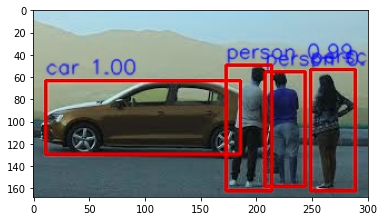

In [9]:
f = 'abhi.jpeg'
path = 'images/'+f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

image1=cv2.imread('images/res/' + f)
plt.imshow(image1)

time: 0.64s
class: person, score: 0.97
box coordinate x,y,w,h: [164.47118354 126.91135883 124.38696098 269.9040314 ]
class: bicycle, score: 0.71
box coordinate x,y,w,h: [181.67599189 265.76298195 129.02900052 173.76445425]
class: car, score: 1.00
box coordinate x,y,w,h: [554.17056513 202.45042133 266.73272228 155.79185921]
class: car, score: 0.99
box coordinate x,y,w,h: [277.69383478 213.65053701 191.31410038 134.28809816]
class: car, score: 0.96
box coordinate x,y,w,h: [453.19289303 203.46907091 142.69882917 149.23918378]
class: truck, score: 0.64
box coordinate x,y,w,h: [753.46846676 176.23910838 123.62730372 176.58467174]
class: truck, score: 0.62
box coordinate x,y,w,h: [ -8.01487595 138.25533554 109.63090158 207.80631274]



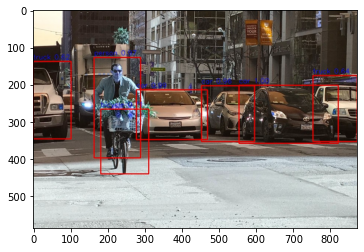

In [10]:
f = 'yoloexample.jpeg'
path = 'images/'+f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

image1=cv2.imread('images/res/' + f)
plt.imshow(image1,cmap='gray')